In [26]:
from frame_classification_process import frame_process
from keras.utils import to_categorical
import numpy as np
import os
from models import models

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# load data info
curr_path = os.getcwd()
x_train_ind = np.load(curr_path+'/datasets/x_train_ind_above400.npy')
y_train = np.load(curr_path+'/datasets/y_train_mapped_above400.npy')

In [3]:
#### grab small part of training data ####
num_videos = 500
num_videos = len(y_train) if num_videos > len(y_train) else num_videos

x_train_ind = x_train_ind[:num_videos]
y_train_ori = np.copy(y_train[:num_videos])
unique, counts = np.unique(y_train_ori, return_counts=True)
num_classes = len(unique)

fp = frame_process(num_videos, size = (64,64,3))
X_train = fp.process_frameSeq(x_train_ind)
y_train = to_categorical(y_train_ori, num_classes=num_classes)
# np.save("./datasets/X_train_10_64_64_3.npy", X_train)

100%|██████████| 500/500 [01:04<00:00,  7.86it/s]


In [8]:
#### load full training data ####
curr_path = os.getcwd()
X_train = np.load("./datasets/X_train_10_64_64_3.npy")
y_train = np.load(curr_path+'/datasets/y_train_mapped_above400.npy')
unique, counts = np.unique(y_train, return_counts=True)
num_classes = len(unique)
y_train_ori = np.copy(y_train)
y_train = to_categorical(y_train, num_classes=num_classes)

In [27]:
#### check data ####
num_videos = len(y_train)
print("X shape: ", X_train.shape, "y shape: ", y_train.shape)
print("frame size: ", X_train.shape[2:])
print("num_videos:", num_videos)
print("num_classes", num_classes)
y_count = dict(zip(unique, counts))
print(y_count)

X shape:  (4270, 10, 64, 64, 3) y shape:  (4270, 10)
frame size:  (64, 64, 3)
num_videos: 4270
num_classes 10
{0: 445, 1: 285, 2: 669, 3: 311, 4: 557, 5: 510, 6: 354, 7: 395, 8: 318, 9: 426}


In [12]:
### parameter tunning ###
lrs = []
regs = []
accs = []
val_accs = []
for i in range(50):
    reg = 10 ** np.random.uniform(-1.5,1.5)
    lr = 10 ** np.random.uniform(-1.5, -2.5)
    
    c3d = models(model_name = "c3d", size = (64,64,3), num_classes = num_classes, reg = reg)
    c3d.train(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2, verbose = 0,  lr = lr )
    print('lr:', lr,', reg:', reg,', train acc:', c3d.history.history['acc'][-1],', val acc:', c3d.history.history['val_acc'][-1])
    lrs.append(lr)
    regs.append(reg)
    accs.append(c3d.history.history['acc'][-1])
    val_accs.append(c3d.history.history['val_acc'][-1])

lr: 0.004510762894146129 , reg: 0.33856218360823304 , train acc: 0.475 , val acc: 0.21
lr: 0.015838261841550613 , reg: 3.793718245040353 , train acc: 0.225 , val acc: 0.13
lr: 0.0040605703638626305 , reg: 15.13932150275651 , train acc: 0.33 , val acc: 0.2
lr: 0.0044594085779742785 , reg: 0.6021937824441866 , train acc: 0.445 , val acc: 0.16
lr: 0.008915766309930987 , reg: 1.7643247844510044 , train acc: 0.3825 , val acc: 0.22
lr: 0.00449515469668398 , reg: 1.5745866936185475 , train acc: 0.4225 , val acc: 0.17
lr: 0.005064701439795281 , reg: 2.2220680633899876 , train acc: 0.3725 , val acc: 0.19
lr: 0.018727803847396453 , reg: 0.0890638471976762 , train acc: 0.145 , val acc: 0.13
lr: 0.004929629194299693 , reg: 10.478712062263433 , train acc: 0.32 , val acc: 0.23
lr: 0.013583399727837626 , reg: 0.04426909488587641 , train acc: 0.2475 , val acc: 0.21
lr: 0.011391637266484216 , reg: 2.1109494846270525 , train acc: 0.27 , val acc: 0.19
lr: 0.003370554483465544 , reg: 0.058639029220179544 

In [23]:
np.log10(4e-1)

-0.3979400086720376

In [28]:
#### create model ####
from models import models
reg = 4e-1
lr = 6e-3
c3d = models(model_name = "c3d", size = (64,64,3), num_classes = num_classes, reg = reg )
# c3d.load(model_path, model_name, model_name)

In [29]:
#### training ####
c3d.train(X_train, y_train, epochs=50, batch_size=32, validation_split = 0.2, verbose = 1,  lr = lr)
# c3d.save(model_path , model_name, model_name)

Train on 3416 samples, validate on 854 samples
Epoch 1/50
3416/3416 [==============================] - 11s - loss: 152.0399 - acc: 0.1953 - val_loss: 122.9584 - val_acc: 0.2014
Epoch 2/50
3416/3416 [==============================] - 10s - loss: 113.0908 - acc: 0.2383 - val_loss: 105.3271 - val_acc: 0.2623
Epoch 3/50
3416/3416 [==============================] - 10s - loss: 100.2639 - acc: 0.2503 - val_loss: 95.7939 - val_acc: 0.2658
Epoch 4/50
3416/3416 [==============================] - 10s - loss: 92.4538 - acc: 0.2520 - val_loss: 89.3558 - val_acc: 0.2681
Epoch 5/50
3416/3416 [==============================] - 10s - loss: 86.8825 - acc: 0.2561 - val_loss: 84.5440 - val_acc: 0.2728
Epoch 6/50
3416/3416 [==============================] - 10s - loss: 82.5933 - acc: 0.2646 - val_loss: 80.7291 - val_acc: 0.2705
Epoch 7/50
3416/3416 [==============================] - 10s - loss: 79.1235 - acc: 0.2641 - val_loss: 77.5859 - val_acc: 0.2728
Epoch 8/50
3416/3416 [==============================

Test Accuracy: 0.28758782201405153


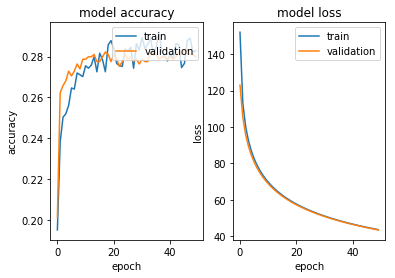

In [30]:
#### result ####
ypred = c3d.model.predict(X_train)
ypred_label = np.argmax(ypred, axis = 1)
print('Test Accuracy: {0}'.format(np.mean(ypred_label == y_train_ori)))
c3d.plot()

In [100]:
# random data for test
x_rand_0 = np.random.normal(0, 0.1, (5,10,64,64,3))
x_rand_1 = np.random.normal(0, 0.1, (5,10,64,64,3))
x_rand = np.vstack( (x_rand_0, x_rand_1))
X_train = x_rand
y_train_ori = np.array([0,0,0,0,0,1,1,1,1,1])
y_train = to_categorical(y_train_ori, num_classes=2)
print(X_train.shape, y_train_ori.shape, y_train.shape)


(10, 10, 64, 64, 3) (10,) (10, 2)


(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


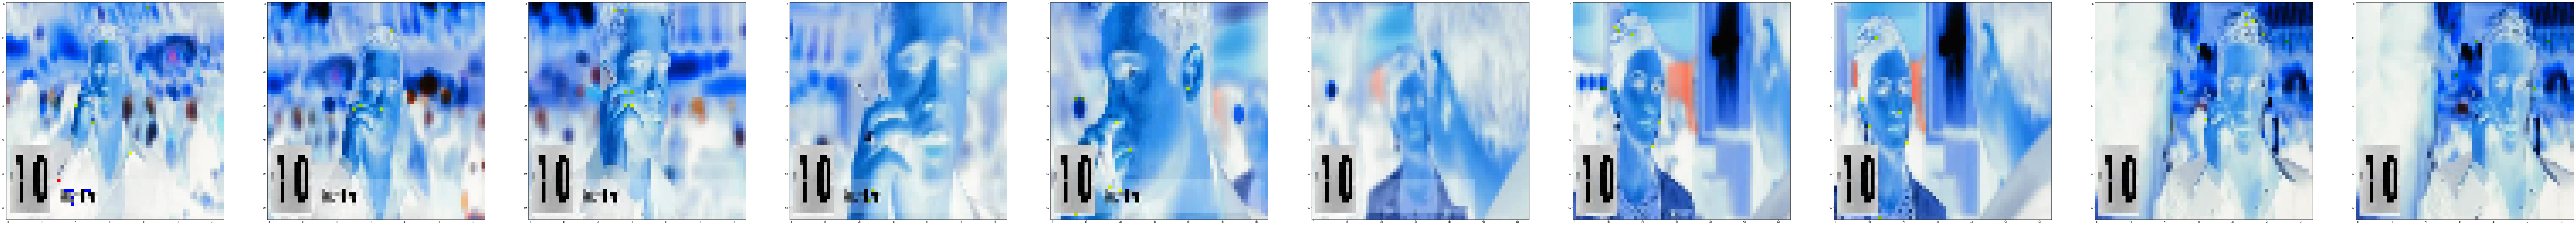

In [10]:
import matplotlib.pyplot as plt

video = X_train[10,:,:,:,:]
plt.figure(figsize=(200,60))
for t in range(video.shape[0]):
    frame_t = video[t]
    plt.subplot(1,10,t+1)
    plt.imshow(frame_t)
plt.show()



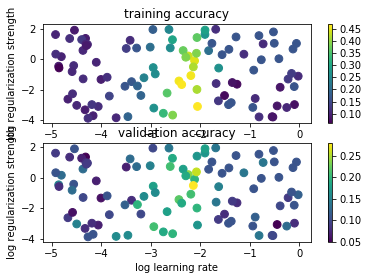

In [9]:
# rough search
import math
import matplotlib.pyplot as plt


x_scatter = [math.log10(x) for x in lrs]
y_scatter = [math.log10(x) for x in regs]


# plot training accuracy
marker_size = 60
colors = [x for x in accs]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('training accuracy')

# plot validation accuracy
colors = [x for x in val_accs] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('validation accuracy')
plt.show()

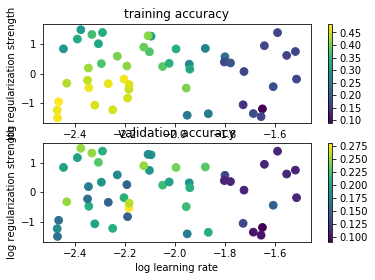

In [13]:
# subtle search
import math
import matplotlib.pyplot as plt


x_scatter = [math.log10(x) for x in lrs]
y_scatter = [math.log10(x) for x in regs]


# plot training accuracy
marker_size = 60
colors = [x for x in accs]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('training accuracy')

# plot validation accuracy
colors = [x for x in val_accs] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('validation accuracy')
plt.show()